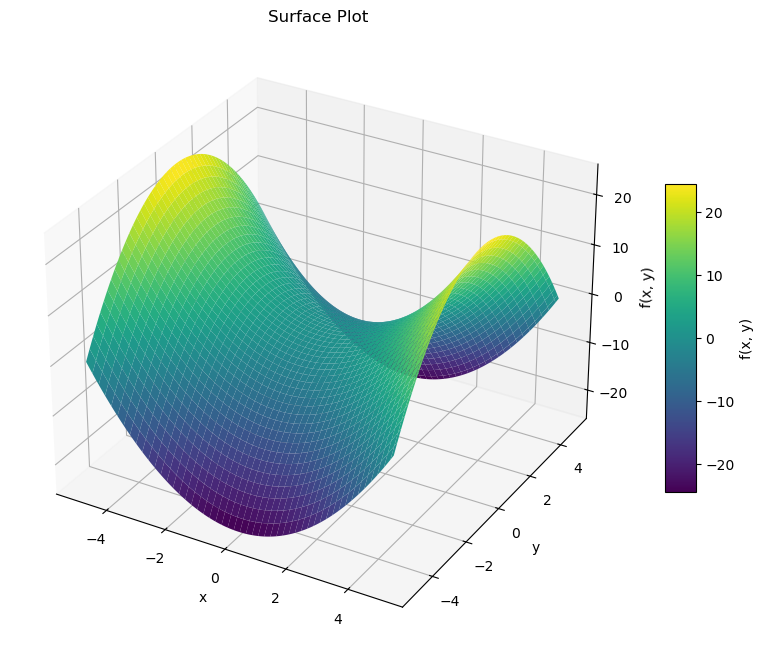

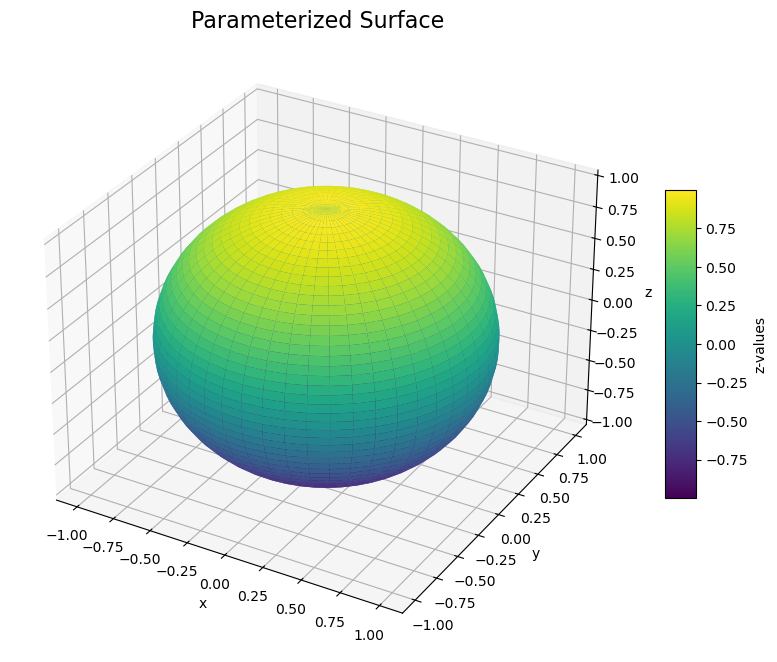

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Surface Plotter Explicitly in xy
def surface_plot(f, x_range, y_range):
    """
    Plots the surface of a multivariable function.

    :param f: The multivariable function f(x, y).
    :param x_range: Tuple of (x_min, x_max) for the x-axis range.
    :param y_range: Tuple of (y_min, y_max) for the y-axis range.
    """
    # Create the meshgrid
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # Create the 3D surface plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

    # Add labels and a color bar
    ax.set_title("Surface Plot")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")
    fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10, label="f(x, y)")

    plt.show()

# Surface plotter for parameterized surfaces
def plot_parameterized_surface(x_func, y_func, z_func, u_range, v_range, u_steps=50, v_steps=50, cmap="viridis"):
    """
    Plot a parameterized surface defined by x(u, v), y(u, v), z(u, v).

    :param x_func: Function for x(u, v).
    :param y_func: Function for y(u, v).
    :param z_func: Function for z(u, v).
    :param u_range: Tuple (u_min, u_max) defining the range of u.
    :param v_range: Tuple (v_min, v_max) defining the range of v.
    :param u_steps: Number of steps for u.
    :param v_steps: Number of steps for v.
    :param cmap: Colormap for the surface.
    """
    # Generate u and v values
    u = np.linspace(u_range[0], u_range[1], u_steps)
    v = np.linspace(v_range[0], v_range[1], v_steps)
    u_grid, v_grid = np.meshgrid(u, v)

    # Compute x, y, z values
    x = x_func(u_grid, v_grid)
    y = y_func(u_grid, v_grid)
    z = z_func(u_grid, v_grid)

    # Create the plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(x, y, z, cmap=cmap, edgecolor='none')

    # Add a colorbar
    fig.colorbar(surface, shrink=0.5, aspect=10, label="z-values")

    # Add labels and title
    ax.set_title("Parameterized Surface", fontsize=16)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.show()


# Main Program
if __name__ == "__main__":
    # Define the function
    f = lambda x, y: (x**2 - y**2)  # Example: f(x, y) = sin(sqrt(x^2 + y^2))

    # Define the ranges
    x_range = (-5, 5)  # Range for x
    y_range = (-5, 5)  # Range for y

    # Plot the surface
    surface_plot(f, x_range, y_range)



    # Define parameterized functions (In this case it is a sphere)
    x_func = lambda u, v: np.sin(u) * np.cos(v)
    y_func = lambda u, v: np.sin(u) * np.sin(v)
    z_func = lambda u, v: np.cos(u)

    # Define parameter ranges
    u_range = (0, np.pi)  # u from 0 to π
    v_range = (0, 2 * np.pi)  # v from 0 to 2π

    # Plot the parameterized surface
    plot_parameterized_surface(x_func, y_func, z_func, u_range, v_range)

First-Order Partial Derivatives for f(x, y):
∂g/∂x: 0.000000
∂g/∂y: 0.000000

Second-Order Partial Derivatives for f(x, y):
∂²g/∂x²: 2.000000
∂²g/∂y²: -2.000000
∂²g/∂x∂y: 0.000000


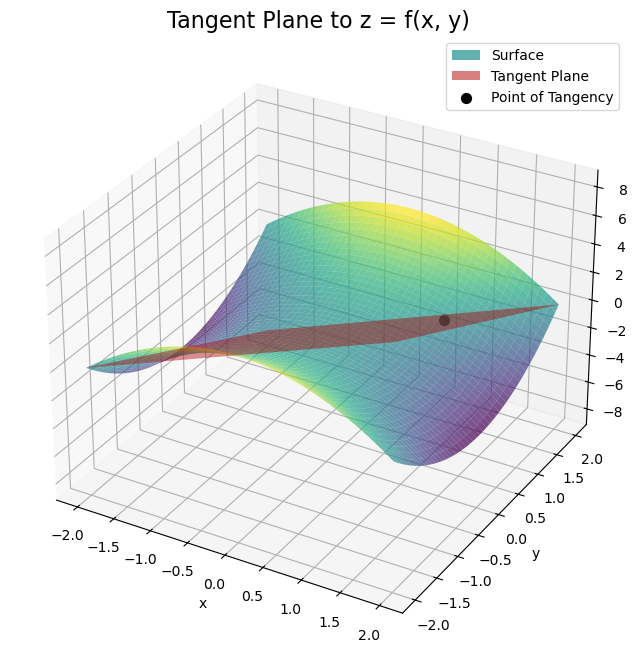

In [57]:
""" Segment 2 - Partial Derivative Estimator """


import numpy as np

# Define the multivariable function
def f(x, y, z):
    return x**2 + y**2 + z**2  # Example: f(x, y, z) = x^2 + y^2 + z^2

# First-Order Partial Derivatives
def partial_derivative(f, var, x, y, z=None, h=1e-5, is_3d=True):
    """
    Compute the first-order partial derivative of f with respect to a given variable.

    :param f: Multivariable function f(x, y, [z]).
    :param var: Variable to differentiate ('x', 'y', or 'z').
    :param x, y, z: Point at which the derivative is estimated.
    :param h: Step size for finite differences.
    :param is_3d: Boolean indicating if the function is 3D or 2D.
    :return: Estimated partial derivative.
    """
    if not is_3d:  # Handle the 2D case
        if var == 'x':
            return (f(x + h, y) - f(x - h, y)) / (2 * h)
        elif var == 'y':
            return (f(x, y + h) - f(x, y - h)) / (2 * h)
        else:
            raise ValueError("Invalid variable for 2D function. Choose 'x' or 'y'.")
    else:  # Handle the 3D case
        if var == 'x':
            return (f(x + h, y, z) - f(x - h, y, z)) / (2 * h)
        elif var == 'y':
            return (f(x, y + h, z) - f(x, y - h, z)) / (2 * h)
        elif var == 'z':
            return (f(x, y, z + h) - f(x, y, z - h)) / (2 * h)
        else:
            raise ValueError("Invalid variable for 3D function. Choose 'x', 'y', or 'z'.")

# Second-Order Partial Derivatives
def second_partial_derivative(f, var1, var2, x, y, z=None, h=1e-5, is_3d=True):
    """
    Compute the second-order mixed or pure partial derivative of f.

    :param f: Multivariable function f(x, y, [z]).
    :param var1: First variable to differentiate ('x', 'y', or 'z').
    :param var2: Second variable to differentiate ('x', 'y', or 'z').
    :param x, y, z: Point at which the derivative is estimated.
    :param h: Step size for finite differences.
    :param is_3d: Boolean indicating if the function is 3D or 2D.
    :return: Estimated second-order partial derivative.
    """
    if not is_3d:  # Handle the 2D case
        if var1 == var2:  # Pure second derivative
            if var1 == 'x':
                return (f(x + h, y) - 2 * f(x, y) + f(x - h, y)) / (h**2)
            elif var1 == 'y':
                return (f(x, y + h) - 2 * f(x, y) + f(x, y - h)) / (h**2)
        elif {var1, var2} == {'x', 'y'}:  # Mixed derivative
            return (f(x + h, y + h) - f(x + h, y - h) - f(x - h, y + h) + f(x - h, y - h)) / (4 * h**2)
    else:  # Handle the 3D case
        if var1 == var2:  # Pure second derivative
            if var1 == 'x':
                return (f(x + h, y, z) - 2 * f(x, y, z) + f(x - h, y, z)) / (h**2)
            elif var1 == 'y':
                return (f(x, y + h, z) - 2 * f(x, y, z) + f(x, y - h, z)) / (h**2)
            elif var1 == 'z':
                return (f(x, y, z + h) - 2 * f(x, y, z) + f(x, y, z - h)) / (h**2)
        elif {var1, var2} == {'x', 'y'}:
            return (f(x + h, y + h, z) - f(x + h, y - h, z) - f(x - h, y + h, z) + f(x - h, y - h, z)) / (4 * h**2)
        elif {var1, var2} == {'x', 'z'}:
            return (f(x + h, y, z + h) - f(x + h, y, z - h) - f(x - h, y, z + h) + f(x - h, y, z - h)) / (4 * h**2)
        elif {var1, var2} == {'y', 'z'}:
            return (f(x, y + h, z + h) - f(x, y + h, z - h) - f(x, y - h, z + h) + f(x, y - h, z - h)) / (4 * h**2)
    raise ValueError("Invalid variable combination or dimensionality mismatch.")


def compute_tangent_plane(f, x0, y0, x_range, y_range, h=1e-5):
    """
    Compute and plot the tangent plane to the surface z = f(x, y) at point (x0, y0).

    :param f: Multivariable function f(x, y).
    :param x0: x-coordinate of the point of tangency.
    :param y0: y-coordinate of the point of tangency.
    :param x_range: Tuple defining the range of x values for the plot.
    :param y_range: Tuple defining the range of y values for the plot.
    :param h: Step size for finite differences.
    """
    # Compute the partial derivatives at the point (x0, y0)
    df_dx = (f(x0 + h, y0) - f(x0 - h, y0)) / (2 * h)
    df_dy = (f(x0, y0 + h) - f(x0, y0 - h)) / (2 * h)

    # Function value at the point
    z0 = f(x0, y0)

    # Define the tangent plane equation
    def tangent_plane(x, y):
        return z0 + df_dx * (x - x0) + df_dy * (y - y0)

    # Generate the grid for plotting
    x_vals = np.linspace(x_range[0], x_range[1], 50)
    y_vals = np.linspace(y_range[0], y_range[1], 50)
    x_grid, y_grid = np.meshgrid(x_vals, y_vals)
    z_grid = tangent_plane(x_grid, y_grid)

    # Generate the surface for the original function
    z_surface = np.array([[f(x, y) for y in y_vals] for x in x_vals])

    # Plot the function and tangent plane
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Surface plot of the function
    ax.plot_surface(x_grid, y_grid, z_surface, alpha=0.7, cmap='viridis', label="Surface")
    
    # Surface plot of the tangent plane
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.5, color='red', label="Tangent Plane")

    # Plot the point of tangency
    ax.scatter(x0, y0, z0, color='black', s=50, label="Point of Tangency")

    # Labels and title
    ax.set_title("Tangent Plane to z = f(x, y)", fontsize=16)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.legend()
    plt.show()



# Main Program
if __name__ == "__main__":
     
    f = lambda x, y: x**2 - y**2  # Example: f(x, y) = x^2 - y^2
    # Toggle between 3D and 2D
    is_3d = False  # Set to False for 2D

    # Points of evaluation
    x, y = 0.0, 0.0
    h = 1e-5

    if is_3d:
        print("First-Order Partial Derivatives for f(x, y, z):")
        print(f"∂f/∂x: {partial_derivative(f, 'x', x, y, z, h, is_3d):.6f}")
        print(f"∂f/∂y: {partial_derivative(f, 'y', x, y, z, h, is_3d):.6f}")
        print(f"∂f/∂z: {partial_derivative(f, 'z', x, y, z, h, is_3d):.6f}")

        print("\nSecond-Order Partial Derivatives for f(x, y, z):")
        print(f"∂²f/∂x²: {second_partial_derivative(f, 'x', 'x', x, y, z, h, is_3d):.6f}")
        print(f"∂²f/∂y²: {second_partial_derivative(f, 'y', 'y', x, y, z, h, is_3d):.6f}")
        print(f"∂²f/∂z²: {second_partial_derivative(f, 'z', 'z', x, y, z, h, is_3d):.6f}")
        print(f"∂²f/∂x∂y: {second_partial_derivative(f, 'x', 'y', x, y, z, h, is_3d):.6f}")
    else:
        print("First-Order Partial Derivatives for f(x, y):")
        print(f"∂g/∂x: {partial_derivative(f, 'x', x, y, None, h, is_3d):.6f}")
        print(f"∂g/∂y: {partial_derivative(f, 'y', x, y, None, h, is_3d):.6f}")

        print("\nSecond-Order Partial Derivatives for f(x, y):")
        print(f"∂²g/∂x²: {second_partial_derivative(f, 'x', 'x', x, y,None, h, is_3d):.6f}")
        print(f"∂²g/∂y²: {second_partial_derivative(f, 'y', 'y', x, y,None, h, is_3d):.6f}")
        print(f"∂²g/∂x∂y: {second_partial_derivative(f, 'x', 'y', x, y,None, h, is_3d):.6f}")


    # Define the point of tangency and range
    x0, y0 = 1.0, 1.0  # Point of tangency
    x_range = (-2, 2)
    y_range = (-2, 2)

    # Compute and plot the tangent plane
    compute_tangent_plane(f, x0, y0, x_range, y_range)







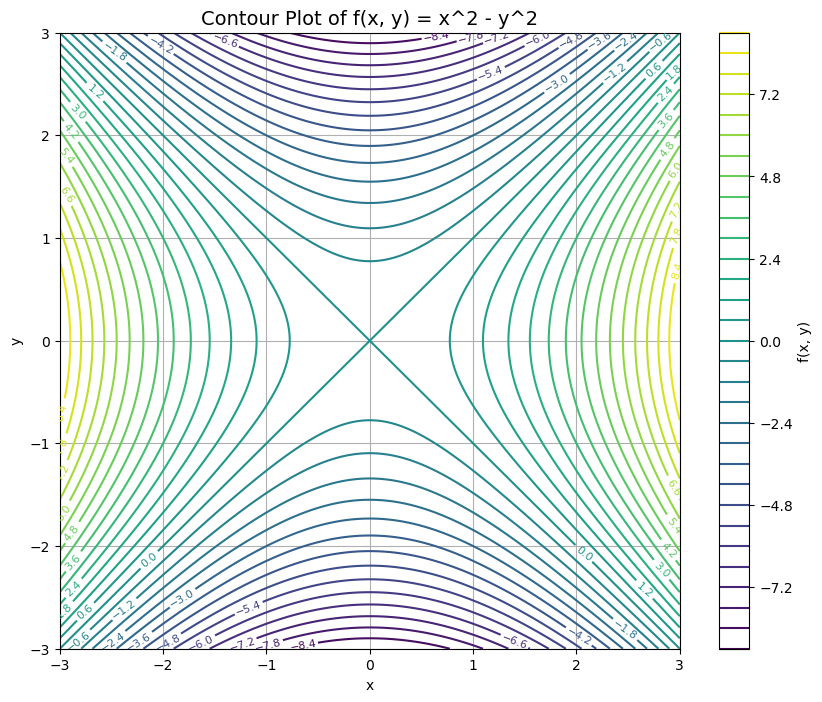

In [67]:
""" Segment 3 - Contour Plots"""


import numpy as np
import matplotlib.pyplot as plt

def plot_contours(f, x_range, y_range, levels=20, title="Contour Plot", show_colorbar=True):
    """
    Produce contour plots for a multivariable function f(x, y).

    :param f: Multivariable function f(x, y).
    :param x_range: Tuple defining the range of x values (xmin, xmax).
    :param y_range: Tuple defining the range of y values (ymin, ymax).
    :param levels: Number of contour levels.
    :param title: Title of the plot.
    :param show_colorbar: Boolean to show or hide the colorbar.
    """
    # Generate a grid of x and y values
    x_vals = np.linspace(x_range[0], x_range[1], 500)
    y_vals = np.linspace(y_range[0], y_range[1], 500)
    x_grid, y_grid = np.meshgrid(x_vals, y_vals)

    # Compute z values using broadcasting
    z_grid = f(x_grid, y_grid)

    # Create the contour plot
    plt.figure(figsize=(10, 8))
    contour = plt.contour(x_grid, y_grid, z_grid, levels=levels, cmap="viridis")
    plt.clabel(contour, inline=True, fontsize=8)  # Add labels to the contours

    # Add a colorbar
    if show_colorbar:
        plt.colorbar(contour, label="f(x, y)")

    # Add labels and title
    plt.title(title, fontsize=14)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Define the function
    f = lambda x, y: x**2 - y**2  # Example: f(x, y) = x^2 - y^2

    # Define the range for x and y
    x_range = (-3, 3)
    y_range = (-3, 3)

    # Plot the contours
    plot_contours(f, x_range, y_range, levels=30, title="Contour Plot of f(x, y) = x^2 - y^2")


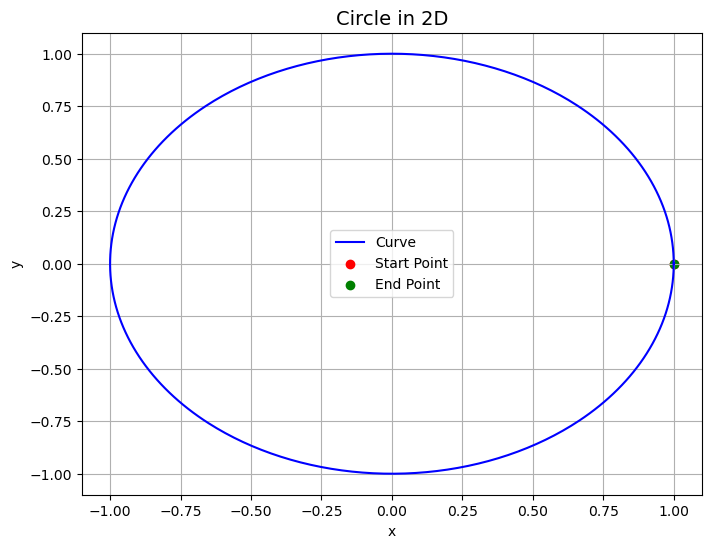

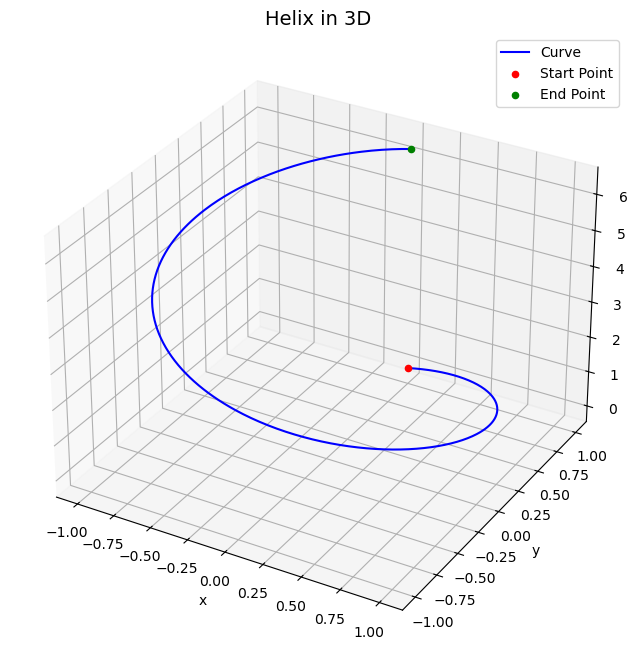

In [79]:
""" Segment 4 - Parameterized Curve """


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_parameterized_curve_2d(x_func, y_func, t_range, t_steps=500, title="Parameterized Curve (2D)"):
    """
    Plot a parameterized 2D curve defined by x(t) and y(t).
    
    :param x_func: Function for x(t).
    :param y_func: Function for y(t).
    :param t_range: Tuple (t_min, t_max) defining the range of t.
    :param t_steps: Number of steps for t.
    :param title: Title of the plot.
    """
    # Generate t values
    t = np.linspace(t_range[0], t_range[1], t_steps)

    # Compute x and y values
    x = x_func(t)
    y = y_func(t)

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label="Curve", color="blue")
    plt.scatter(x[0], y[0], color="red", label="Start Point")  # Mark start point
    plt.scatter(x[-1], y[-1], color="green", label="End Point")  # Mark end point
    plt.title(title, fontsize=14)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    plt.show()

def plot_parameterized_curve_3d(x_func, y_func, z_func, t_range, t_steps=500, title="Parameterized Curve (3D)"):
    """
    Plot a parameterized 3D curve defined by x(t), y(t), and z(t).
    
    :param x_func: Function for x(t).
    :param y_func: Function for y(t).
    :param z_func: Function for z(t).
    :param t_range: Tuple (t_min, t_max) defining the range of t.
    :param t_steps: Number of steps for t.
    :param title: Title of the plot.
    """
    # Generate t values
    t = np.linspace(t_range[0], t_range[1], t_steps)

    # Compute x, y, and z values
    x = x_func(t)
    y = y_func(t)
    z = z_func(t)

    # Create the plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z, label="Curve", color="blue")
    ax.scatter(x[0], y[0], z[0], color="red", label="Start Point")  # Mark start point
    ax.scatter(x[-1], y[-1], z[-1], color="green", label="End Point")  # Mark end point
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Define parameterized functions for 2D
    x_func_2d = lambda t: np.cos(t)
    y_func_2d = lambda t: np.sin(t)

    # Define parameterized functions for 3D
    x_func_3d = lambda t: np.sin(t)
    y_func_3d = lambda t: np.cos(t)
    z_func_3d = lambda t: t

    # Define the range for t
    t_range = (0, 2 * np.pi)

    # Plot the parameterized 2D curve
    plot_parameterized_curve_2d(x_func_2d, y_func_2d, t_range, title="Circle in 2D")

    # Plot the parameterized 3D curve
    plot_parameterized_curve_3d(x_func_3d, y_func_3d, z_func_3d, t_range, title="Helix in 3D")


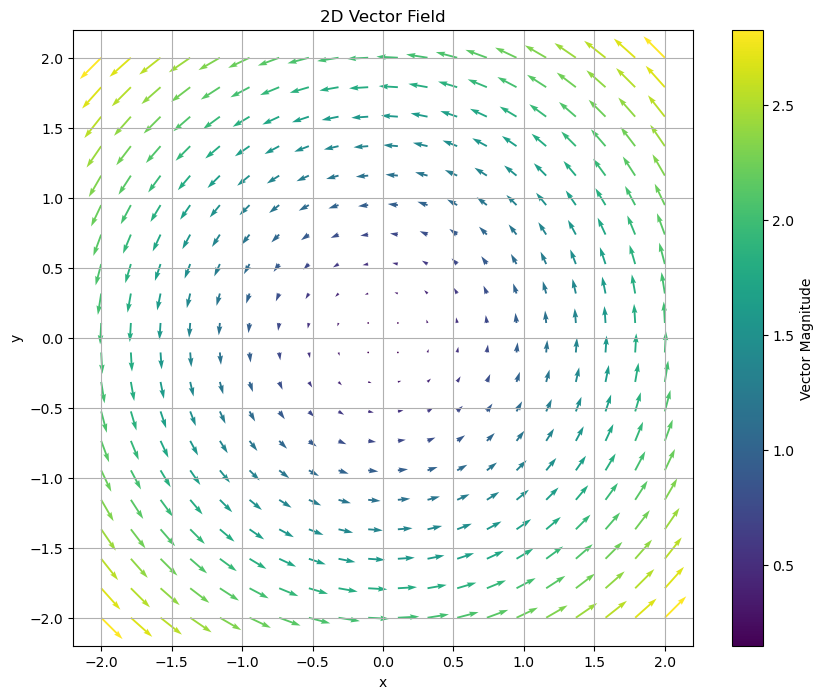

C:\Users\diego\AppData\Local\Temp\ipykernel_12612\717973973.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(norm(magnitude))[:, :, :, :3]  # RGB colors


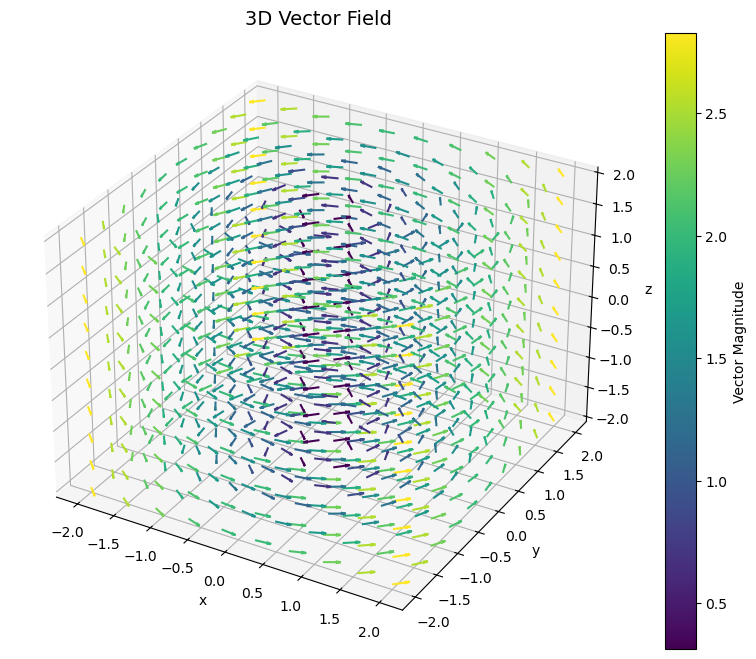

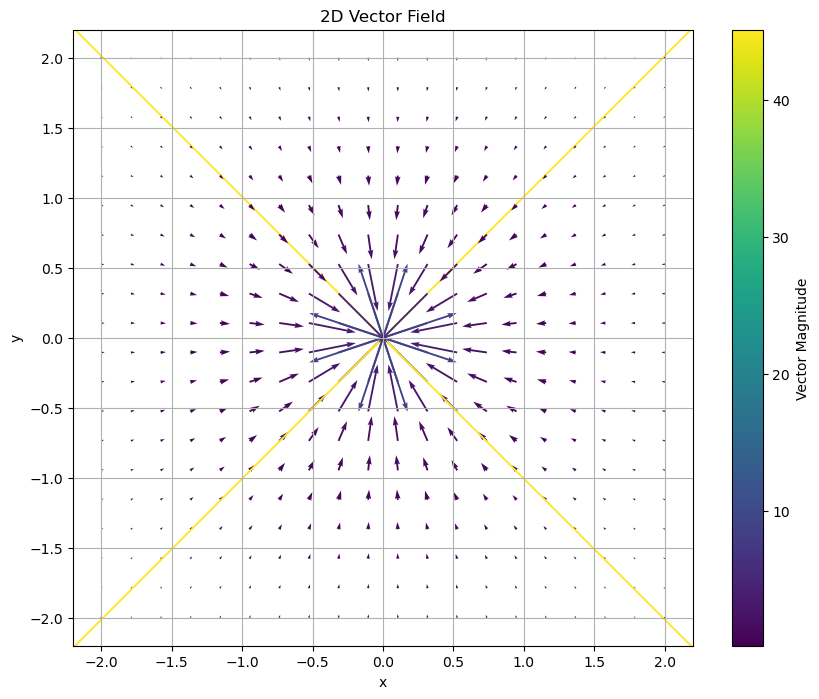

In [103]:
""" Segment 6 - Vector Field Plotter """


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_vector_field_2d(fx, fy, x_range, y_range, density=10, cmap="viridis"):
    """
    Plot a 2D vector field defined by Fx(x, y) and Fy(x, y).

    :param fx: Function defining Fx(x, y).
    :param fy: Function defining Fy(x, y).
    :param x_range: Tuple (xmin, xmax) defining the range of x.
    :param y_range: Tuple (ymin, ymax) defining the range of y.
    :param density: Number of vectors per axis.
    :param cmap: Colormap for vector magnitudes.
    """
    # Generate a grid of x and y values
    x = np.linspace(x_range[0], x_range[1], density)
    y = np.linspace(y_range[0], y_range[1], density)
    x_grid, y_grid = np.meshgrid(x, y)

    # Compute vector components
    Fx = fx(x_grid, y_grid)
    Fy = fy(x_grid, y_grid)

    # Compute magnitude for coloring
    magnitude = np.sqrt(Fx**2 + Fy**2)

    # Create the quiver plot
    plt.figure(figsize=(10, 8))
    plt.quiver(x_grid, y_grid, Fx, Fy, magnitude, cmap=cmap)
    plt.colorbar(label="Vector Magnitude")
    plt.title("2D Vector Field")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()

def plot_vector_field_3d(fx, fy, fz, x_range, y_range, z_range, density=5, cmap="viridis"):
    """
    Plot a 3D vector field defined by Fx(x, y, z), Fy(x, y, z), Fz(x, y, z).

    :param fx: Function defining Fx(x, y, z).
    :param fy: Function defining Fy(x, y, z).
    :param fz: Function defining Fz(x, y, z).
    :param x_range: Tuple (xmin, xmax) defining the range of x.
    :param y_range: Tuple (ymin, ymax) defining the range of y.
    :param z_range: Tuple (zmin, zmax) defining the range of z.
    :param density: Number of vectors per axis.
    :param cmap: Colormap for vector magnitudes.
    """
    # Generate a grid of x, y, z values
    x = np.linspace(x_range[0], x_range[1], density)
    y = np.linspace(y_range[0], y_range[1], density)
    z = np.linspace(z_range[0], z_range[1], density)
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Compute vector components
    Fx = fx(x_grid, y_grid, z_grid)
    Fy = fy(x_grid, y_grid, z_grid)
    Fz = fz(x_grid, y_grid, z_grid)

    # Compute magnitude for coloring
    magnitude = np.sqrt(Fx**2 + Fy**2 + Fz**2)
    norm = plt.Normalize(magnitude.min(), magnitude.max())  # Normalize magnitudes for colormap
    colors = plt.cm.get_cmap(cmap)(norm(magnitude))[:, :, :, :3]  # RGB colors

    # Create the 3D quiver plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(x_grid, y_grid, z_grid, Fx, Fy, Fz,length=0.2, normalize=True, color=colors.reshape(-1, 3) )

    # Set plot attributes
    ax.set_title("3D Vector Field", fontsize=14)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Vector Magnitude")
    plt.show()

# Example usage
if __name__ == "__main__":
    # Define vector field components for 2D
    fx_2d = lambda x, y: -y
    fy_2d = lambda x, y: x

    # Define vector field components for 3D
    fx_3d = lambda x, y, z: -y
    fy_3d = lambda x, y, z: x
    fz_3d = lambda x, y, z: 0

    

    # Define ranges
    x_range = (-2, 2)
    y_range = (-2, 2)
    z_range = (-2, 2)

    # Plot the 2D vector field
    plot_vector_field_2d(fx_2d, fy_2d, x_range, y_range, density=20)

    # Plot the 3D vector field
    plot_vector_field_3d(fx_3d, fy_3d, fz_3d, x_range, y_range, z_range, density=10)

    # For 2D field visualization
    fx_2d = lambda x, y: -x / (x**2 + y**2)**(3/2)
    fy_2d = lambda x, y: -y / (x**2 + y**2)**(3/2)
    # Plot the 2D vector field
    plot_vector_field_2d(fx_2d, fy_2d, x_range, y_range, density=20)







In [107]:
""" Segment 7 - Vector Derivatives """

import numpy as np

# Vector derivatives implementation
if __name__ == "__main__":
    # Define grid dimensions
    x = np.linspace(-5, 5, 50)
    y = np.linspace(-5, 5, 50)
    z = np.linspace(-5, 5, 50)
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

    # Define the vector field components
    Fx = Y * Z  # F_x = yz
    Fy = X * Z  # F_y = xz
    Fz = X * Y  # F_z = xy

    # Represent the vector field explicitly as a vector
    F = np.array([Fx, Fy, Fz])  # Shape: (3, Nx, Ny, Nz)

    # Compute gradients of the vector field components
    grad_Fx = np.gradient(F[0], x, y, z, edge_order=2)  # [dFx/dx, dFx/dy, dFx/dz]
    grad_Fy = np.gradient(F[1], x, y, z, edge_order=2)  # [dFy/dx, dFy/dy, dFy/dz]
    grad_Fz = np.gradient(F[2], x, y, z, edge_order=2)  # [dFz/dx, dFz/dy, dFz/dz]

    # Compute divergence: div_F = dFx/dx + dFy/dy + dFz/dz
    div_F = grad_Fx[0] + grad_Fy[1] + grad_Fz[2]

    # Compute curl: curl_F = [curl_x, curl_y, curl_z]
    curl_x = grad_Fz[1] - grad_Fy[2]  # ∂Fz/∂y - ∂Fy/∂z
    curl_y = grad_Fx[2] - grad_Fz[0]  # ∂Fx/∂z - ∂Fz/∂x
    curl_z = grad_Fy[0] - grad_Fx[1]  # ∂Fy/∂x - ∂Fx/∂y
    curl_F = np.array([curl_x, curl_y, curl_z])  # Shape: (3, Nx, Ny, Nz)



    # Define the scalar field
    x = np.linspace(-5, 5, 50)
    y = np.linspace(-5, 5, 50)
    z = np.linspace(-5, 5, 50)
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
    f = X**2 + Y**2 + Z**2  # Example scalar field f(x, y, z)

    # Compute gradient
    df_dx, df_dy, df_dz = np.gradient(f, x, y, z)  # Partial derivatives
    grad_f = np.array([df_dx, df_dy, df_dz])  # Gradient vector

    # Compute second derivatives
    d2f_dx2 = np.gradient(df_dx, x, axis=0)  # ∂²f/∂x²
    d2f_dy2 = np.gradient(df_dy, y, axis=1)  # ∂²f/∂y²
    d2f_dz2 = np.gradient(df_dz, z, axis=2)  # ∂²f/∂z²

    # Compute Laplacian
    laplacian_f = d2f_dx2 + d2f_dy2 + d2f_dz2






In [116]:

""" Segment 8 - Volume Integral """


import numpy as np
from scipy.integrate import tplquad

# Define the function f(x, y, z) in Cartesian coordinates
def f_cartesian(x, y, z):
    return x**2 + y**2 + z**2  # Example function

# Define the function f(u, v, w) in generic uvw coordinates
def f_generic(u, v, w):
    return u**2 + v**2 + w**2  # Example function

# Volume integral in Cartesian coordinates
def volume_integral_cartesian(f, x_bounds, y_bounds, z_bounds):
    """
    Compute the volume integral in Cartesian coordinates with variable bounds.
    
    :param f: Function f(x, y, z)
    :param x_bounds: Tuple of (xmin, xmax)
    :param y_bounds: Function of x for ymin and ymax
    :param z_bounds: Function of x, y for zmin and zmax
    :return: Volume integral result
    """
    result, error = tplquad(
        f,
        x_bounds[0], x_bounds[1],  # x bounds
        lambda x: y_bounds(x)[0], lambda x: y_bounds(x)[1],  # y bounds as functions of x
        lambda x, y: z_bounds(x, y)[0], lambda x, y: z_bounds(x, y)[1]  # z bounds as functions of x and y
    )
    return result

# Volume integral in generic uvw coordinates
def volume_integral_generic(f, u_bounds, v_bounds, w_bounds, volume_element):
    """
    Compute the volume integral in generic uvw coordinates with variable bounds.
    
    :param f: Function f(u, v, w)
    :param u_bounds: Tuple of (umin, umax)
    :param v_bounds: Function of u for vmin and vmax
    :param w_bounds: Function of u, v for wmin and wmax
    :param volume_element: Volume element as a function of u, v, w
    :return: Volume integral result
    """
    def integrand(w, v, u):
        return f(u, v, w) * volume_element(u, v, w)

    result, error = tplquad(
        integrand,
        u_bounds[0], u_bounds[1],  # u bounds
        lambda u: v_bounds(u)[0], lambda u: v_bounds(u)[1],  # v bounds as functions of u
        lambda u, v: w_bounds(u, v)[0], lambda u, v: w_bounds(u, v)[1]  # w bounds as functions of u and v
    )
    return result

# Main Program
if __name__ == "__main__":
    # Cartesian example with variable bounds
    x_bounds = (-1, 1)
    y_bounds = lambda x: (0, x)  # y bounds depend on x
    z_bounds = lambda x, y: (-1, x + y)  # z bounds depend on x and y

    print("Volume integral in Cartesian coordinates:")
    cartesian_result = volume_integral_cartesian(f_cartesian, x_bounds, y_bounds, z_bounds)
    print(f"Result: {cartesian_result:.6f}")

    # Generic uvw example with variable bounds
    u_bounds = (0, 1)
    v_bounds = lambda u: (0, np.pi)  # v bounds depend on u
    w_bounds = lambda u, v: (0, 2 * np.pi)  # w bounds depend on u and v
    volume_element = lambda u, v, w: u**2 * np.sin(v)  # Example spherical coordinates volume element: r^2 sin(θ)

    print("\nVolume integral in generic uvw coordinates:")
    generic_result = volume_integral_generic(f_generic, u_bounds, v_bounds, w_bounds, volume_element)
    print(f"Result: {generic_result:.6f}")


Volume integral in Cartesian coordinates:
Result: 1.333333

Volume integral in generic uvw coordinates:
Result: 69.928814


In [121]:
""" Segment 9 - Surface Integral """


from scipy.integrate import dblquad
import numpy as np

# Parameterize a generic surface r(u, v)
def parametrize_surface(u, v):
    """
    Define the parameterized surface r(u, v).
    
    Example: Helicoid surface
    r(u, v) = (u * cos(v), u * sin(v), v)
    
    :param u: Parameter u
    :param v: Parameter v
    :return: Array [x, y, z] representing the surface point.
    """
    x = u * np.cos(v)
    y = u * np.sin(v)
    z = v
    return np.array([x, y, z])

# Numerically compute partial derivatives r_u and r_v
def compute_partials(u, v, delta=1e-5):
    """
    Compute the partial derivatives r_u and r_v numerically.

    :param u: Parameter u
    :param v: Parameter v
    :param delta: Small step size for numerical differentiation
    :return: Tuple (r_u, r_v) as arrays
    """
    r = parametrize_surface(u, v)
    r_u = (parametrize_surface(u + delta, v) - r) / delta
    r_v = (parametrize_surface(u, v + delta) - r) / delta
    return r_u, r_v

# Define the vector field F = (Fx, Fy, Fz)
def vector_field(x, y, z):
    """
    Define the vector field F = (Fx, Fy, Fz).
    
    Example: F = (x, y, z)
    
    :param x: x-component
    :param y: y-component
    :param z: z-component
    :return: Tuple (Fx, Fy, Fz)
    """
    return x, y, z  # Example vector field

# Compute F · (r_u × r_v)
def integrand(u, v):
    """
    Compute the integrand for the surface integral F · (r_u × r_v).
    
    :param u: Parameter u
    :param v: Parameter v
    :return: Scalar value of F · (r_u × r_v)
    """
    # Parameterize the surface
    r = parametrize_surface(u, v)
    Fx, Fy, Fz = vector_field(r[0], r[1], r[2])
    
    # Compute r_u and r_v
    r_u, r_v = compute_partials(u, v)
    
    # Compute the cross product r_u × r_v
    r_u_cross_r_v = np.cross(r_u, r_v)
    
    # Dot product F · (r_u × r_v)
    F_dot_n = Fx * r_u_cross_r_v[0] + Fy * r_u_cross_r_v[1] + Fz * r_u_cross_r_v[2]
    
    return F_dot_n

# Integration bounds for u and v
u_bounds = (0, 1)  # Example: u in [0, 1]
v_bounds = (0, 2 * np.pi)  # Example: v in [0, 2π]

# Perform the surface integral
surface_integral, error = dblquad(
    integrand,
    v_bounds[0], v_bounds[1],  # Integration over v
    lambda v: u_bounds[0], lambda v: u_bounds[1]  # Integration over u
)

print("Surface Integral:", surface_integral)



Surface Integral: 9.869604400668708


In [123]:
""" Segment 10 - Line Integral """


from scipy.integrate import quad
import numpy as np

# Parameterize a generic curve r(t)
def parametrize_curve(t):
    """
    Parameterize the curve r(t).
    
    Example: A helix
    r(t) = (R * cos(t), R * sin(t), c * t)
    
    :param t: Parameter t
    :return: Array [x, y, z] representing the curve point.
    """
    R = 1  # Radius of the helix
    c = 0.5  # Vertical step per rotation
    x = R * np.cos(t)
    y = R * np.sin(t)
    z = c * t
    return np.array([x, y, z])

# Numerically compute the derivative of r(t) at t using finite differences
def derivative_of_curve(t, delta=1e-5):
    """
    Compute the derivative of the curve r(t) numerically.

    :param t: Parameter t
    :param delta: Small step size for numerical differentiation
    :return: Array [dx/dt, dy/dt, dz/dt] representing the tangent vector.
    """
    r_plus = parametrize_curve(t + delta)  # r(t + Δt)
    r_minus = parametrize_curve(t - delta)  # r(t - Δt)
    return (r_plus - r_minus) / (2 * delta)  # Central difference approximation

# Define the vector field F = (Fx, Fy, Fz)
def vector_field(r):
    """
    Define the vector field F = (Fx, Fy, Fz).
    
    Example: F = (x, y, z)
    
    :param r: Array [x, y, z]
    :return: Array [Fx, Fy, Fz]
    """
    x, y, z = r
    return np.array([x, y, z])  # Example vector field

# Compute the dot product F · dr/dt
def integrand(t):
    """
    Compute the integrand for the line integral F · dr/dt.

    :param t: Parameter t
    :return: Scalar value of F · dr/dt
    """
    r = parametrize_curve(t)
    dr_dt = derivative_of_curve(t)
    F = vector_field(r)
    return np.dot(F, dr_dt)  # Dot product F · dr/dt

# Main Program
if __name__ == "__main__":
    # Integration bounds
    t_bounds = (0, 2 * np.pi)  # Example: One full rotation of the helix

    # Perform the line integral
    line_integral, error = quad(integrand, *t_bounds)
    print("Line Integral:", line_integral)
    print("Estimated Error:", error)

Line Integral: 4.9348022004364465
Estimated Error: 5.516922413748871e-14


In [125]:
""" Segment 11 - Lagrange Multipliers """


from scipy.optimize import minimize

# Define the objective function
def objective(x):
    """
    Objective function f(x, y).
    """
    return x[0]**2 + x[1]**2  # f(x, y) = x^2 + y^2

# Define the constraint g(x, y) = 0
def constraint1(x):
    """
    First equality constraint g1(x, y).
    """
    return x[0] + x[1] - 1  # g1(x, y) = x + y - 1

def constraint2(x):
    """
    Second equality constraint g2(x, y).
    """
    return x[0] - x[1] + 0.5  # g2(x, y) = x - y + 0.5

# Initial guess
x0 = [0.5, 0.5]

# Define the constraints as dictionaries
constraints = [
    {'type': 'eq', 'fun': constraint1},
    {'type': 'eq', 'fun': constraint2}
]

# Solve the optimization problem
result = minimize(objective, x0, constraints=constraints)

# Print the solution
print("Solution:", result.x)
print("Objective value at solution:", result.fun)

Solution: [0.25 0.75]
Objective value at solution: 0.625
